1-1. 載入所需的套件 pandas, matplotlib, numpy, 

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = 'HanWangHeiHeavy' # 設定字型檔讓 matplotlib 使用
import collections
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format

1-2. 載入資料學測資料檔 exam_xc.csv 存為變數 examxc

In [176]:
exam = pd.read_csv('exam_hk.csv')
exam.head(5)

,QID,代號,來源,類別,年份,題型,題號,題目簡述,答案,章節,章節（短）,大主題,P,Book
0,"13,867.00",jdchk-ma103-1-01ax,會考數學103,會考數學,103,單選,1,根式的化簡,(D),m4ngs-1 根式,根式,數與量,64,3
1,"13,868.00",jdchk-ma103-1-02ax,會考數學103,會考數學,103,單選,2,從標準分解式找因數,(C),m4nyb-1 因數與倍數,因數與倍數,數與量,74,1
2,"13,869.00",jdchk-ma103-1-03ax,會考數學103,會考數學,103,單選,3,求梯形的上底,(C),m4ngs-1 根式,根式,數與量,68,3
3,"13,870.00",jdchk-ma103-1-04ax,會考數學103,會考數學,103,單選,4,取牌組出 6 的倍數的機率,(A),m4djl-1 基礎機率,基礎機率,機率統計,67,6
4,"13,871.00",jdchk-ma103-1-05ax,會考數學103,會考數學,103,單選,5,用乘法公式化簡,(A),m4adx-2 乘法公式,多項式與乘法公式,代數,73,3


1-3. 刪除 QID 欄，且將代號設為 index

In [177]:
del exam["QID"]
exam = exam.set_index(["代號"])
exam.head(2)

,來源,類別,年份,題型,題號,題目簡述,答案,章節,章節（短）,大主題,P,Book
代號,,,,,,,,,,,,
jdchk-ma103-1-01ax,會考數學103,會考數學,103,單選,1,根式的化簡,(D),m4ngs-1 根式,根式,數與量,64,3
jdchk-ma103-1-02ax,會考數學103,會考數學,103,單選,2,從標準分解式找因數,(C),m4nyb-1 因數與倍數,因數與倍數,數與量,74,1


2.1 分別計算 單選, 多選, 填充的數量

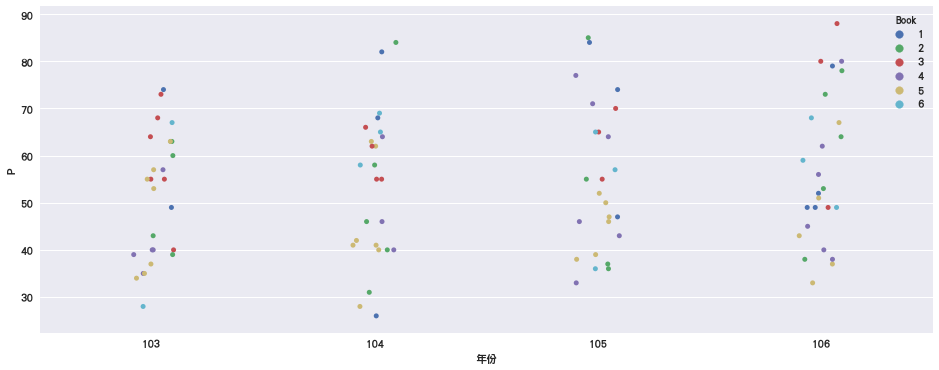

In [178]:
plt.figure(figsize=(16,6))
sns.stripplot(x="年份",y="P",data=exam,jitter=True,hue="Book")

In [179]:
exam[["年份","P"]].groupby(
    "年份").mean().T

年份,103,104,105,106
P,51.33,53.28,54.88,56.92


In [180]:
exam[["大主題","P"]].groupby(
    "大主題").mean().T

大主題,代數,幾何,數與量,機率統計
P,57.61,48.98,56.30,59.75


In [181]:
examRate=exam[["年份","大主題","P"]].pivot_table(
    index="年份",columns="大主題",
    values='P',aggfunc=np.mean).T
examRate

年份,103,104,105,106
大主題,,,,
代數,53.88,57.86,59.67,59.86
幾何,47.10,48.67,47.64,52.60
數與量,55.57,50.71,61.33,58.29
機率統計,47.50,67.00,61.00,63.50


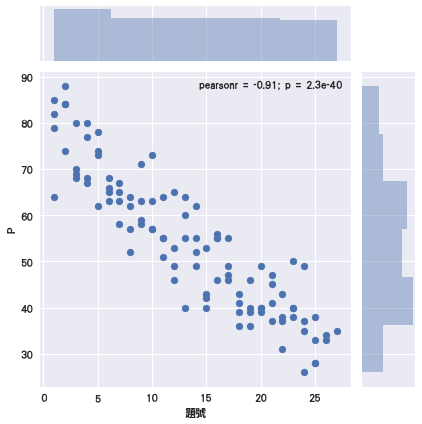

In [182]:
sns.jointplot(x="題號",y="P",data=exam)

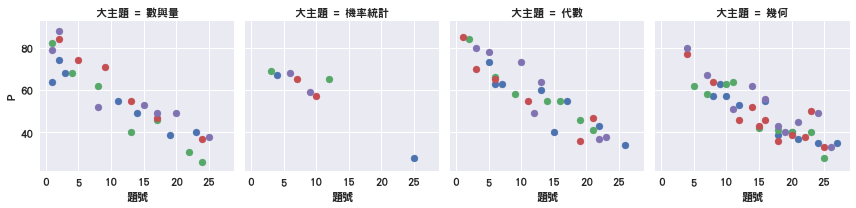

In [183]:
g = sns.FacetGrid(exam,col="大主題",hue="年份")
g.map(plt.scatter,"題號","P")

將 單選, 多選, 填充 分成三個表 singCho, multCho, textBox

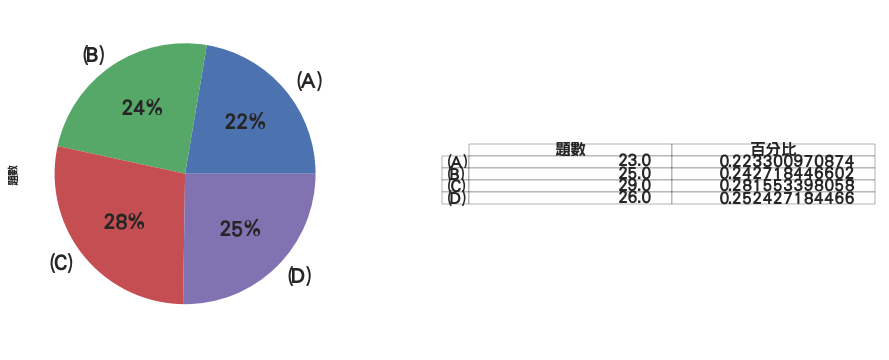

In [184]:
singCho = exam[exam["題型"].isin(['單選'])]
singChoAns = singCho[["答案","P"]].groupby(by = "答案").count()
singChoAns.columns.values[0]="題數"
singChoAns["百分比"]= singChoAns["題數"]/len(singCho)
plt.figure(figsize=(16,6))
ax1 = plt.subplot(121,aspect="equal")
singChoAns.plot(kind='pie',y="題數",ax=ax1, autopct="%2d%%",fontsize = 20,legend=False)
ax2 = plt.subplot(122)
plt.axis("off")
from pandas.tools.plotting import table
tbl = table(ax2,singChoAns,loc="center")
tbl.auto_set_font_size(False)
tbl.set_fontsize(16)
plt.show()

計算三種題型在不同群體的答對率

In [185]:
exambyCh = exam.groupby("章節（短）")
exambyCh= exambyCh.agg({"來源":"count","P":"mean"})
exambyCh.sort_values(by="來源",ascending=False)

,來源,P
章節（短）,,
幾何證明與三心,9,41.89
圓,7,56.43
二元一次聯立方程式,6,65.67
根式,6,65.33
相似形,5,44.60
因數與倍數,5,49.60
三角形的基本性質,5,42.00
比與比例,5,40.00
線對稱圖形,4,58.50


In [186]:
exambyCh.sort_values(by="P",ascending=False)

,來源,P
章節（短）,,
數的四則運算,4,78.25
二元一次聯立方程式,6,65.67
根式,6,65.33
多項式與乘法公式,3,64.67
基礎機率,4,64.25
多項式,3,63.33
平面坐標系,3,59.67
線對稱圖形,4,58.50
不等式(一元一次),3,58.00


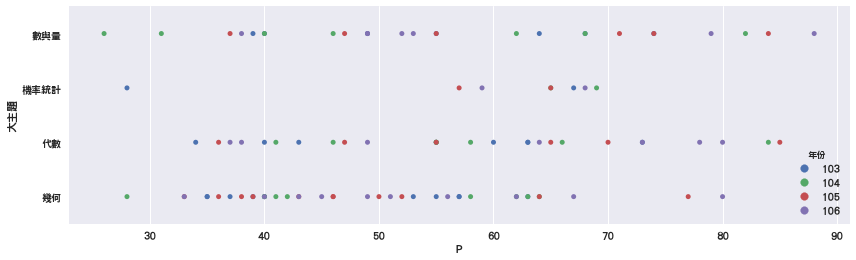

In [187]:
plt.figure(figsize=(14,4))
font = {'size':24}
matplotlib.rc('font',**font)
sns.stripplot(y="大主題",x="P",data=exam,hue="年份")

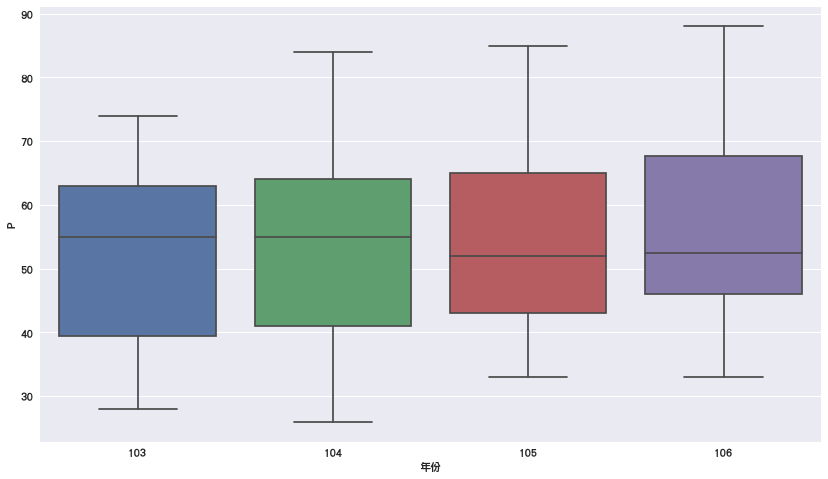

In [188]:
plt.figure(figsize=(14,8))
sns.boxplot(x="年份",y="P",data=exam)

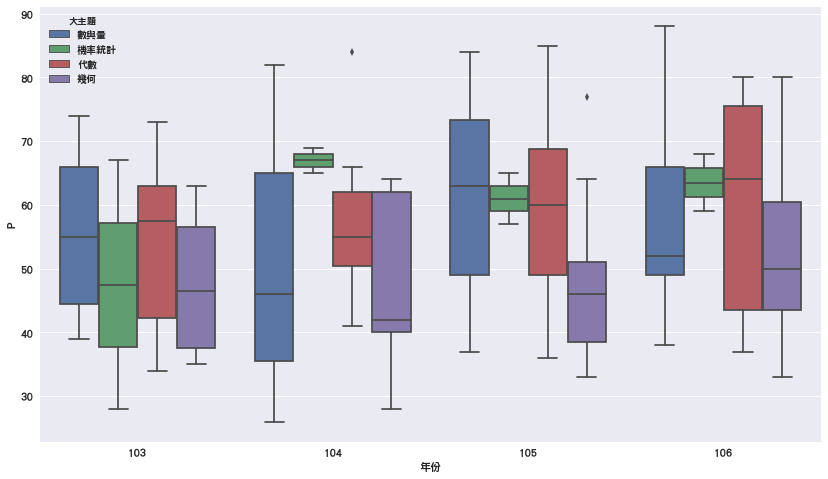

In [189]:
plt.figure(figsize=(14,8))
sns.boxplot(x="年份",y="P",data=exam,hue="大主題")

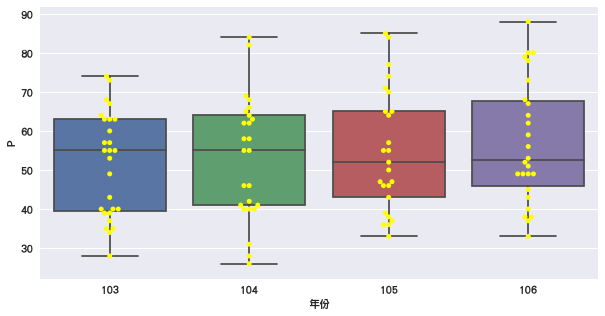

In [190]:
plt.figure(figsize=(10,5))
sns.boxplot(x="年份",y="P",data=exam)
sns.swarmplot(x="年份",y="P",data=exam,color="yellow")

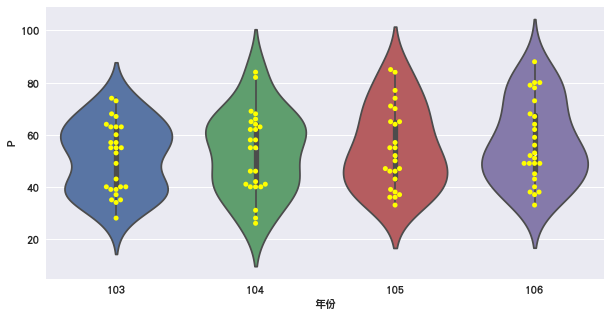

In [191]:
plt.figure(figsize=(10,5))
sns.violinplot(x="年份",y="P",data=exam)
sns.swarmplot(x="年份",y="P",data=exam,color="yellow")

/Users/acchu/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


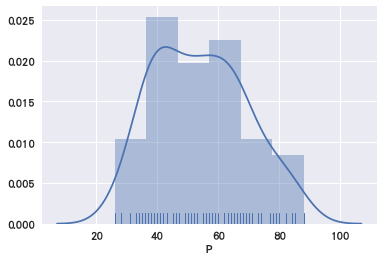

In [193]:
examP = exam[["年份","P"]]
sns.distplot(examP["P"],rug=True)